In [1]:
#Reading dataset
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
iris_data=pd.read_excel('iris.xls')
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


SO IM DOING UNSUPERVISED LEARNING AND THERE IS NO NEED OF LABELED DATA(CLASSIFICATION) AND ID TOO BECOZ NO USE OF THAT(HERE IN THIS DATASET WE DONT HAVE SEPARATE ID) SO IM GONNA ONLY USR COL 1 TO 4

In [2]:
data=iris_data.iloc[:,0:4]
data.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.shape

(150, 4)

In [4]:
data.isna().sum()

SL    0
SW    0
PL    0
PW    0
dtype: int64

In [5]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Normalizing

In [7]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
data=norm.fit_transform(data)

In [8]:
#finding the optimum no of clusters in hc using dendogram

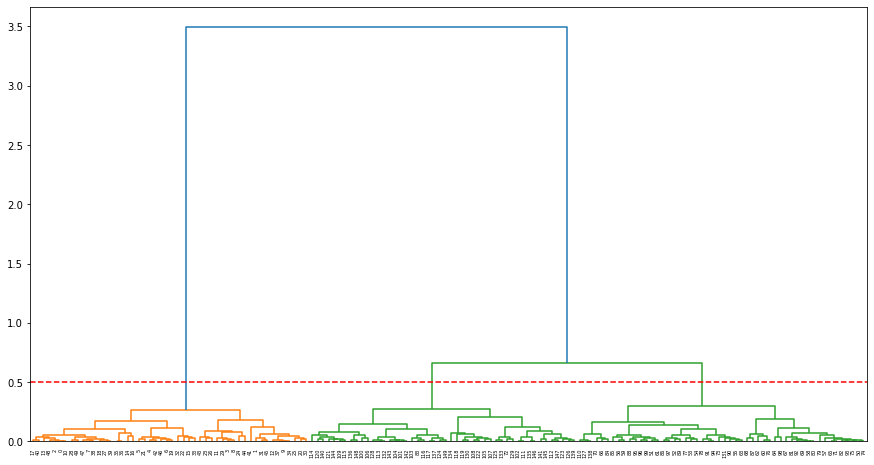

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
linked=linkage(data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(.5,0,5000,colors='r',linestyles='dashed') #for the horizontal line
plt.show()

MODELING 

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(data)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
#Evaluating the model becoz we have the lebelled data too


In [20]:
df=pd.DataFrame({'Labels':labels,'Classification':iris_data['Classification']})

In [23]:
pd.crosstab(df['Labels'],df['Classification'])

Classification,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,0,48,4
1,50,0,0
2,0,2,46
